In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
FILE_NAME = 'Data/MA_Accord_sub.csv'
STATE = 'MA'
MODEL = 'accord'
MILEAGE = 200000
PRICE = 50000

In [3]:
#Read csv file into dataframe
#Outpur: dataframe
def read_file():
    df = pd.read_csv(FILE_NAME, low_memory=False)
    df.drop(columns = ['Unnamed: 0','body_subtype','engine_measure','engine_aspiration',\
                       'speeds','exterior_color','interior_color','first_scraped_at',\
                       'car_address','currency_indicator','miles_indicator','dom_180',\
                       'dom_active','msrp'],inplace = True)
    return df

In [4]:
df = read_file()
len(df)

198315

In [5]:
#Clean data for future use
#Input: dataframe
#Output: df_concat: final dataframe
#        lst: list of color for hybrid cars
def df_clean(df):
    temp = df.loc[df['price'] <= PRICE]
    temp = temp.loc[temp['state'] == STATE]
    temp = temp.loc[temp['miles'] <= MILEAGE]
    temp = temp.loc[temp['model'].str.contains(MODEL, case = False)]
    temp.dropna(subset=['trim'],inplace = True)
    temp['hybrid'] = 0
    temp.loc[temp['trim'].str.contains('hybrid', case = False), 'hybrid'] = 1
    temp.loc[temp['trim'].str.contains('plug-in', case = False), 'hybrid'] = 1
    df_hybrid = temp.loc[temp['hybrid'] == 1]
    df_hybrid.loc[df_hybrid['base_exterior_color'].isnull(), 'base_exterior_color'] = 'No_color'
    df_hybrid.loc[df_hybrid['base_interior_color'].isnull(), 'base_interior_color'] = 'No_color'
    df_hybrid.dropna(subset=['price','miles','base_interior_color','base_exterior_color'],inplace = True)
    df_hybrid['in_out_color'] = df_hybrid['base_exterior_color'] + df_hybrid['base_interior_color']
    lst = list(set(df_hybrid['in_out_color']))
    df_cv = temp.loc[temp['hybrid'] == 0]
    df_cv.dropna(subset=['price','miles','base_interior_color','base_exterior_color'],inplace = True)
    df_cv['in_out_color'] = df_cv['base_exterior_color'] + df_cv['base_interior_color']
    df_cv = df_cv.loc[df_cv['in_out_color'].isin(lst)]
    df_concat = pd.concat([df_hybrid,df_cv]).reset_index(drop = True)
    file_name = STATE + '_' + MODEL + '_final_describe.csv'
    df_concat = df_concat.groupby(['vin','miles','trim','zip','in_out_color']).mean().reset_index()
    df_concat.describe().to_csv(file_name)
    return df_concat

In [6]:
def plot_with_trim(df, cv, hybrid):
    df_hybrid = df.loc[df['trim'].isin(hybrid)]
    df_cv = df.loc[df['trim'].isin(cv)]
    plt.figure(figsize=(14,8))
    title = STATE + ' CV and Hybrid ' +  cv[0] + ' Price vs Miles'
    plt.title(title)
    sns.regplot(x='miles', y='price', data=df_hybrid, order=2)
    sns.regplot(x='miles', y='price', data=df_cv, order=2)
    plt.legend(labels = ['Hybrid','CV'],loc = 'best')
    plt.savefig(fname = title)
    plt.show()
    df_hybrid.describe().to_csv(STATE + '_Hybrid_'+ cv[0] + '_describe.csv')
    df_cv.describe().to_csv(STATE + '_CV_' + cv[0] + '_describe.csv')

In [7]:
df1 = df_clean(df)
len(df1.loc[df1['hybrid'] == 1])

512

In [8]:
cv_EXL = ['EX-L','EX-L V-6','EX-L V6']
cv_Touring = ['Touring','Touring V6']
hybrid_EXL = ['Hybrid EX-L']
hybrid_Touring = ['Hybrid Touring']

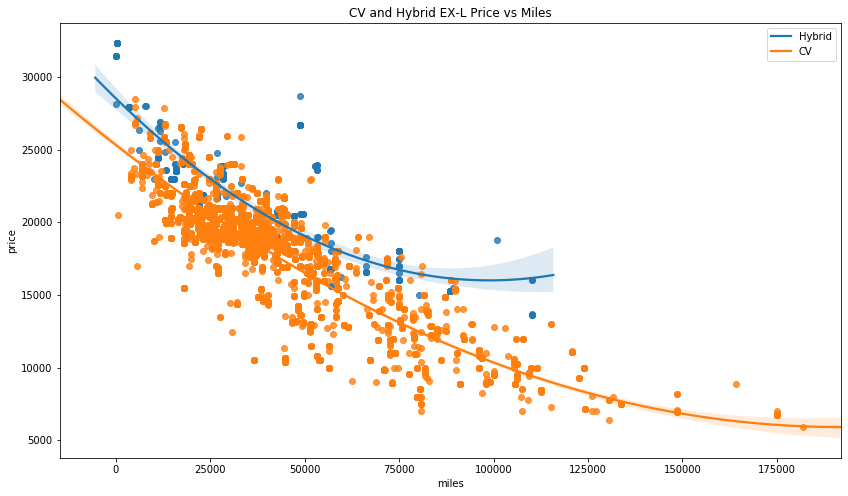

In [9]:
plot_with_trim(df1, cv_EXL, hybrid_EXL)

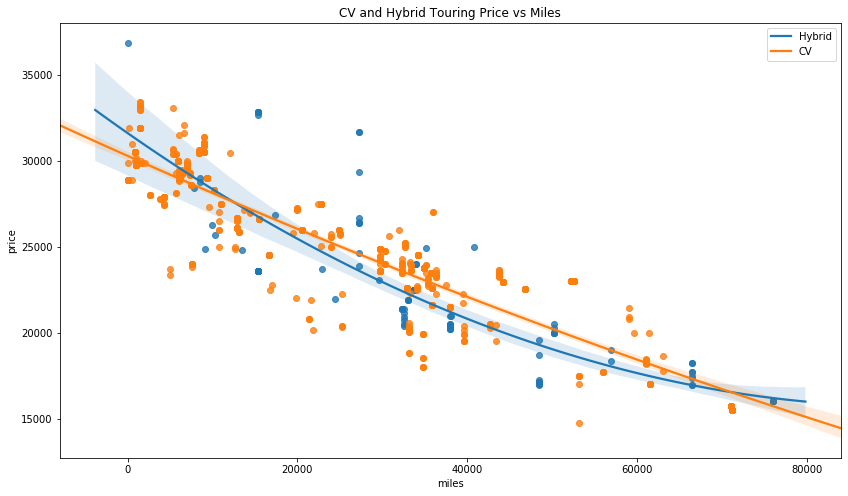

In [10]:
plot_with_trim(df1, cv_Touring, hybrid_Touring)